In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

import numpy as np

In [3]:
# 파일 경로
file_path = '/content/cmm_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='cp949')

In [4]:
# 결측치 및 데이터 타입 확인
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(파일명                                    0
 평면1,평면도                                0
 원1(I) <상>,D                            0
 원2(I) <중>,D                            0
 원3(I) <하>,D                            0
                                       ..
 점30 <- 점18의 되부름 <소재원점>,Y               0
 직선25 <- 직선18의 되부름,X/Y                  0
 직선26 <- 직선16의 되부름,X/Y                  0
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    0
 품질상태                                   0
 Length: 67, dtype: int64,
 파일명                                     object
 평면1,평면도                                float64
 원1(I) <상>,D                            float64
 원2(I) <중>,D                            float64
 원3(I) <하>,D                            float64
                                         ...   
 점30 <- 점18의 되부름 <소재원점>,Y               float64
 직선25 <- 직선18의 되부름,X/Y                  float64
 직선26 <- 직선16의 되부름,X/Y                  float64
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
 품질상태                          

In [5]:
# '파일명' 열 제외
data_numeric = data.drop(columns=['파일명'])

# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# 데이터프레임으로 변환
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)

In [6]:
# 독립 변수와 종속 변수 분리
X = data_imputed.drop(columns=['품질상태'])
y = data_imputed['품질상태']

In [7]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# SVM 모델 생성 및 훈련
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
# 테스트 세트에서 예측
svm_y_pred = svm_model.predict(X_test)

In [33]:
# 모델 평가
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print("SVM Accuracy: ", svm_accuracy, "\n")
print(svm_report)

SVM Accuracy:  0.6737588652482269 

              precision    recall  f1-score   support

         0.0       0.67      1.00      0.81        95
         1.0       0.00      0.00      0.00        46

    accuracy                           0.67       141
   macro avg       0.34      0.50      0.40       141
weighted avg       0.45      0.67      0.54       141



Shape of xy: (900, 2)
Shape of Z: (900,)
Shape of reshaped Z: (30, 30)


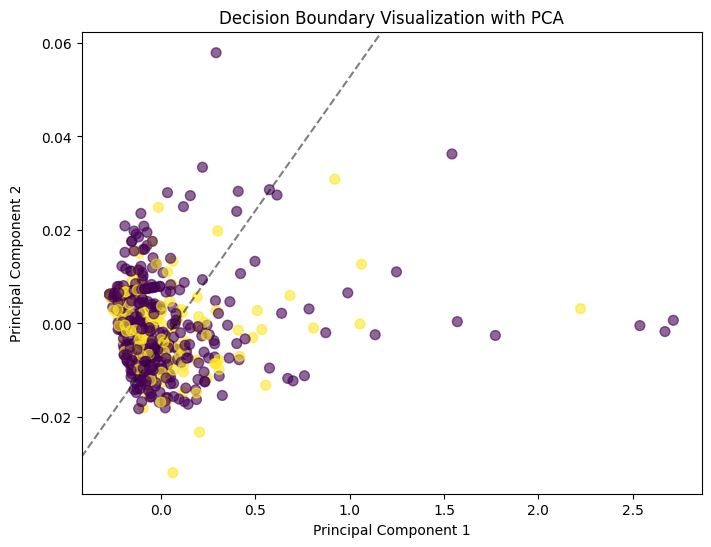

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# SVM 모델 생성 및 훈련
svm_model_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_pca.fit(X_train_pca, y_train)

# 결정 경계를 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 결정 경계 그리기
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

print("Shape of xy:", xy.shape)

# 결정 경계 함수 적용
Z = svm_model_pca.decision_function(xy)
print("Shape of Z:", Z.shape)

Z = Z.reshape(XX.shape)
print("Shape of reshaped Z:", Z.shape)

# 결정 경계 및 마진 시각화
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title('Decision Boundary Visualization with PCA')
plt.show()
